# TITANIC PROJECT EXAMPLE
### Using Python

### PYTHON LIBRARIES

In [319]:
# Data Analysis and Wrangling
import pandas as pd
import numpy as np
import random as rnd
import re

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn import cross_validation
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif

### DATA IDENTIFICATION

In [320]:
# Import Titanic Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data = pd.concat([train, test])
data = data.reindex_axis(['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp',
                          'Parch', 'Ticket','Fare','Cabin','Embarked'], axis=1)

In [321]:
### Analyze by describing data
# Pandas also helps describe the datasets answering following questions early in our project.
print(data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## DATA EXPLORATION

### VARIABLES IDENTIFICATION

In [322]:
#Check current data type:
data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [323]:
# Curiosity: What would have been the price of the tickets in today's money? 
# Taking into account inflation, the price would have increased by about 106 times.
Today_money = data["Fare"].apply(lambda Fare: 106 * Fare)
Today_money.round().head(10)

0     768.0
1    7556.0
2     840.0
3    5629.0
4     853.0
5     897.0
6    5497.0
7    2234.0
8    1180.0
9    3188.0
Name: Fare, dtype: float64

### MISSING VALUES TREATMENT

In [324]:
# Checking Missing Values
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [325]:
# Confirming Missing Values - Train data
train.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [326]:
# Confirming Missing Values - Test data
test.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### VARIABLES ANALYSE

In [327]:
# Checking Struture of Train and Test Dataset
[train.describe().round(), test.describe().round()]

[       PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
 count        891.0     891.0   891.0  714.0  891.0  891.0  891.0
 mean         446.0       0.0     2.0   30.0    1.0    0.0   32.0
 std          257.0       0.0     1.0   15.0    1.0    1.0   50.0
 min            1.0       0.0     1.0    0.0    0.0    0.0    0.0
 25%          224.0       0.0     2.0    NaN    0.0    0.0    8.0
 50%          446.0       0.0     3.0    NaN    0.0    0.0   14.0
 75%          668.0       1.0     3.0    NaN    1.0    0.0   31.0
 max          891.0       1.0     3.0   80.0    8.0    6.0  512.0,
        PassengerId  Pclass    Age  SibSp  Parch   Fare
 count        418.0   418.0  332.0  418.0  418.0  417.0
 mean        1100.0     2.0   30.0    0.0    0.0   36.0
 std          121.0     1.0   14.0    1.0    1.0   56.0
 min          892.0     1.0    0.0    0.0    0.0    0.0
 25%          996.0     1.0    NaN    0.0    0.0    NaN
 50%         1100.0     3.0    NaN    0.0    0.0    NaN
 75%         

In [328]:
# Table with Survived by Pclass, Embarked and Sex
a = data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
b = data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
c = data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
Surstats = pd.concat ([a,b,c],axis =1)
Surstats

,Pclass,Survived,Embarked,Survived,Sex,Survived
0,1,0.629630,C,0.553571,female,0.742038
1,2,0.472826,Q,0.389610,male,0.188908
2,3,0.242363,S,0.336957,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000139D8F98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000014081978>]], dtype=object)

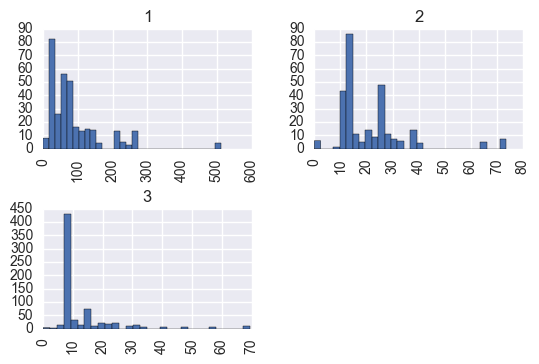

In [330]:
# Analysing Variables Distribution
data.hist(column="Fare",by="Pclass",bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014810A90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000014AA36A0>]], dtype=object)

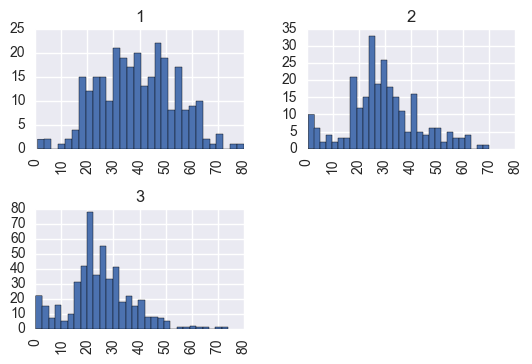

In [331]:
data.hist(column="Age",by="Pclass",bins=30)

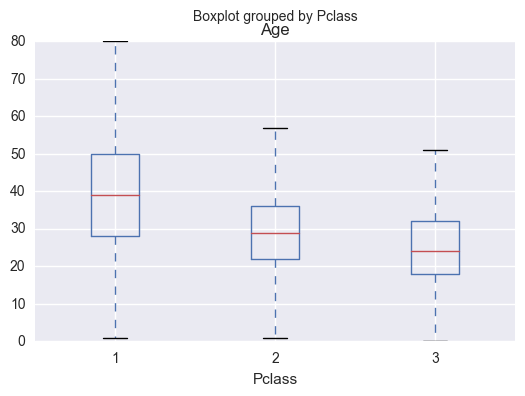

In [332]:
data.boxplot(column="Age",by="Pclass")

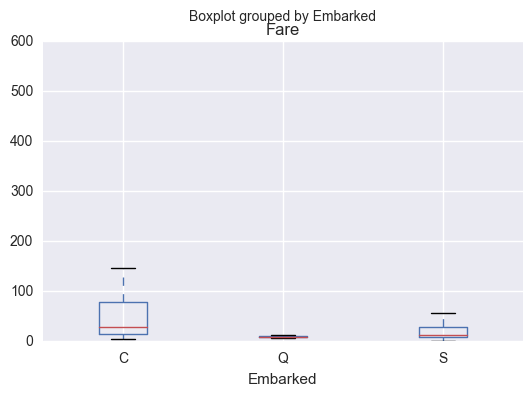

In [333]:
data.boxplot(column="Fare",by="Embarked")

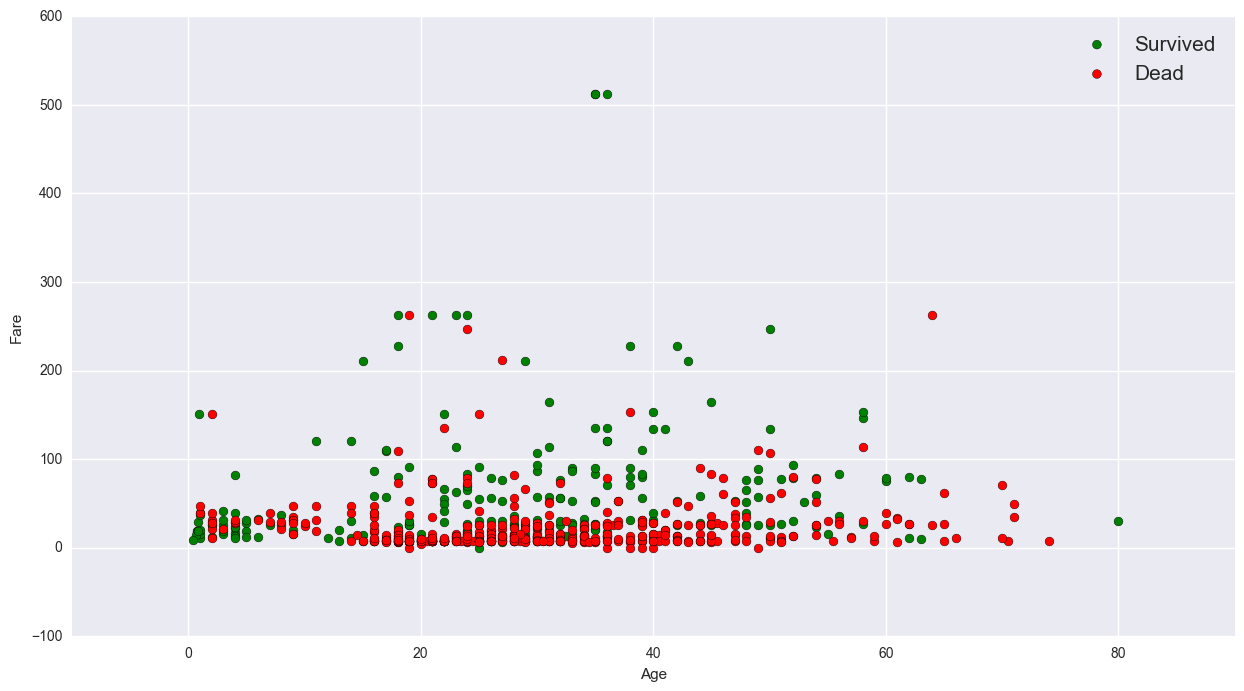

In [334]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('Survived','Dead'),scatterpoints=1,loc='upper right',fontsize=15,)

## FEATURE ENGINEERING

###  VARIABLE CREATION & TRANSFORMATION

In [335]:
# Creating the variable 'Title' from 'Name'
data['Title'] = data['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

data["Title"] = data["Title"].apply(lambda x: "Master" if re.search("Master",x) else x)
data["Title"] = data["Title"].apply(lambda x: "Miss" if re.search("Miss|Mlle|Lady",x) else x)
data["Title"] = data["Title"].apply(lambda x: "Mrs" if re.search("Mrs|Mme|Countess|Ms|Dona",x) else x)
data["Title"] = data["Title"].apply(lambda x: "Mr" if not re.search("Miss|Mrs|Master",x) else x)

data['Title'] = data['Title'].apply(lambda x: 1 if x=="Master" else 2 if x=="Miss" else 3 if x=="Mrs" else 4)

In [336]:
# Creating the variable 'Family' from 'SibSp' and 'Parch' (passeger plus husband/wife and kids) 
data["Family"] = data["SibSp"] + data["Parch"] + 1 

data['Family'] = data['Family'].apply(lambda x: 'Single' if x==1 else 'Big' if x>=5 else 'Medium') 
data['Family'] = data['Family'].apply(lambda x: 1 if x=='Single' else 2 if x=='Medium' else 3)

In [337]:
# Transformation of 'Sex' Variable
data['Sex'] = data['Sex'].apply(lambda x: 1 if x=="female" else 0)

In [338]:
# Transformation of 'Embarked' Variable
data['Embarked'] = data['Embarked'].apply(lambda x: 1 if x=="S" else 2 if x=="C" else 3 if x=="Q" else 0)

In [339]:
# Transformation of 'Fare' Variable into classes
data['Fare'] = data['Fare'].apply(lambda x: 'cheap' if x<=50 else 'expensive' if x>=200 else 'medium') 
data['Fare'] = data['Fare'].apply(lambda x: 1 if x=='cheap' else 3 if x=='expensive' else 2)

### MISSING VALUES TREATMENT

In [340]:
# Treating Missing Values - Fare
data["Fare"].fillna(value=data["Fare"].median()).head(1)

0    1
Name: Fare, dtype: int64

In [341]:
# Treating Missing Values - Embarked
data["Embarked"].fillna(value=data["Embarked"].median()).head(1)

0    1
Name: Embarked, dtype: int64

In [342]:
# Treating Missing Values - Age
data['Age'] = data['Age'].apply(lambda x: 'child' if x<=17 else 'adult' if x>=30 else 'young') 

In [343]:
data["Age"][data["Title"] == 1] = data["Age"].fillna('child')
data["Age"][data["Title"] == 2] = data["Age"].fillna('child')
data["Age"][data["Title"] == 3] = data["Age"].fillna('adult')
data["Age"][data["Title"] == 4] = data["Age"].fillna('adult')

data['Age'] = data['Age'].apply(lambda x: 1 if 'child' else 2 if 'young' else 3) 

C:\Users\Pedro\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Pedro\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Pedro\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Pedro\Anaconda2\lib\site-packages\ipykernel\__m

## MODELLING DATA

In [344]:
# Confirming inesxistance of missing values 
# The variable Cabin will be ignored because of the high number of missing values (~77%).
data.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
Family            0
dtype: int64

In [345]:
# Select predictors array
predictors = ["Sex","Title","Pclass","Fare","Embarked","Age","Family"]

In [346]:
# Isolate the test and train variables
train_model = data[0:891].copy()
test_model = data[891:].copy()

In [347]:
# Select the train and test features values
train_model.features = train_model[predictors].values
test_model.features = test_model[predictors].values

In [348]:
# Feature selection
target = train_model["Survived"].values
k = train_model.features.shape[1]
selector = SelectKBest(f_classif, k=k)
selector.fit(train_model.features, target)
scores = -np.log10(selector.pvalues_)
print(scores)

[ 68.85199425  49.94207413  24.59567142  16.08730233   2.63150678
          nan   2.93422191]


C:\Users\Pedro\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)


In [349]:
kfold_cv = cross_validation.KFold(train_model.shape[0], n_folds=3, random_state=1)

log_reg = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(log_reg, train_model.features, target, cv=kfold_cv)
print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std()*100, 'LGR'))

svc = svm.SVC(kernel='linear', C=1.0, probability=True)
scores = cross_validation.cross_val_score(svc, train_model.features, target, cv=kfold_cv)
print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std()*100, 'SVC'))

rfc = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
scores = cross_validation.cross_val_score(rfc, train_model.features, target, cv=kfold_cv)
print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std()*100, 'RFC'))

gbc = GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3)
scores = cross_validation.cross_val_score(gbc, train_model.features, target, cv=kfold_cv)
print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std()*100, 'GBC'))

vtc = VotingClassifier(estimators=[('RFC', rfc),('GBC',gbc)], voting='soft')
scores = cross_validation.cross_val_score(vtc, train_model.features, target, cv=kfold_cv)
print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std()*100, 'Ens'))


Accuracy: 79.910 (+/- 0.42) [LGR]
Accuracy: 79.237 (+/- 1.41) [SVC]
Accuracy: 83.277 (+/- 1.30) [RFC]
Accuracy: 82.828 (+/- 1.20) [GBC]
Accuracy: 82.267 (+/- 1.11) [Ens]


In [350]:
# Create a prediction for test dataset
vtc.fit(train_model.features, target)
prediction = vtc.predict(test_model.features) 
print(prediction)

[ 0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.  0.
  0.  1.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.
  0.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.
  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.
  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.
  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.
  0.  1.  1.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  0.  1

In [351]:
# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId =np.array(test["PassengerId"]).astype(int)
solution = pd.DataFrame(prediction, PassengerId, columns = ["Survived"])

In [352]:
# Write your solution to a csv file with the name my_solution.csv
solution.to_csv("titanic_sol_py.csv", index_label = ["PassengerId"])
print("Project Done!!!!!!")

Project Done!!!!!!
